# Titanic: Machine Learning from Disaster (Kaggle)


### Objetivo: Usar <i> Machine Learning </i> para prever quais passageiros sobreviveram ao naufrágio do Titanic
Kaggle: [link](https://www.kaggle.com/c/titanic/overview)

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Análise de dados exploratória

In [2]:
# Lendo o arquivo de treinamento
trainSet = pd.read_csv('train.csv')
testSet = pd.read_csv('test.csv')

In [3]:
# Primeiras linhas do treinamento
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cores da paleta dos gráficos da biblioteca do Seaborn:
https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/

Text(0.5, 1.0, 'Sobreviventes')

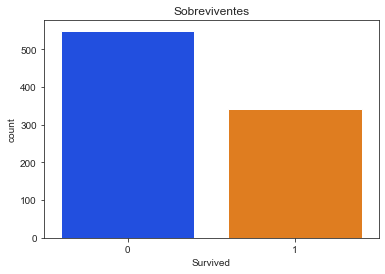

In [4]:
# Distribuição dos sobrevivientes
sns.set_style('ticks')
sns.countplot(x='Survived',data=trainSet,palette='bright')
plt.title("Sobreviventes")

Text(0.5, 1.0, 'Sobreviventes x Sexo')

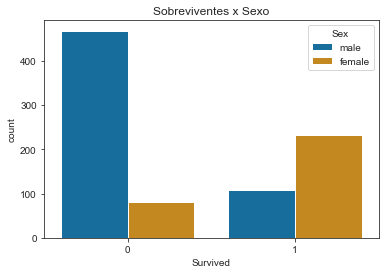

In [5]:
# Distribuição dos sobreviventes p/ sexo
sns.set_style('ticks')
sns.countplot(x='Survived',hue='Sex',data=trainSet,palette='colorblind')
plt.title("Sobreviventes x Sexo")

Text(0.5, 1.0, 'Sobreviventes x Classe')

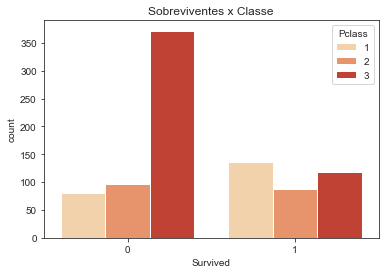

In [6]:
# Distribuição dos sobreviventes p/ Classe
sns.set_style('ticks')
sns.countplot(x='Survived',hue='Pclass',data=trainSet,palette='OrRd')
plt.title("Sobreviventes x Classe")

Text(0.5, 1.0, 'Sobreviventes x SibSp')

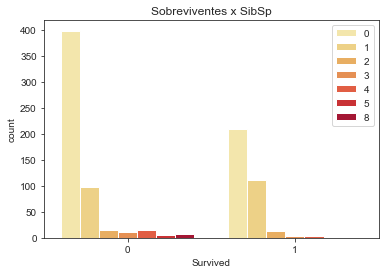

In [7]:
# Distribuição dos sobreviventes p/ número de irmãos / cônjuges no navio

# SibSp -> número de irmãos / cônjuges no navio
sns.set_style('ticks')
sns.countplot(x='Survived',hue='SibSp',data=trainSet,palette='YlOrRd')
plt.legend(loc='upper right') #altera a posição da legenda
plt.title("Sobreviventes x SibSp")

Text(0.5, 1.0, 'Sobreviventes x Parch')

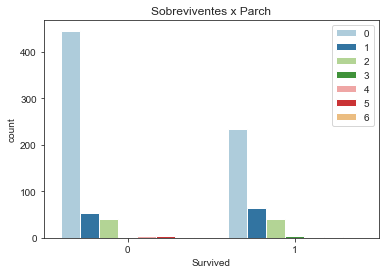

In [8]:
# Distribuição dos sobreviventes p/ número de pais / filhos no navio

# Parch -> número de pais / filhos no navio
sns.set_style('ticks')
sns.countplot(x='Survived',hue='Parch',data=trainSet,palette='Paired')
plt.legend(loc='upper right') #altera a posição da legenda
plt.title("Sobreviventes x Parch")

Text(0.5, 1.0, 'Distribuição da Idade')

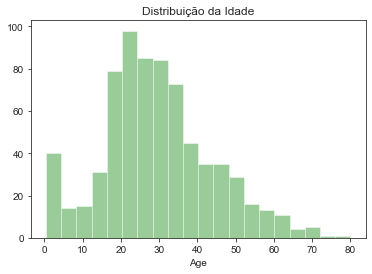

In [9]:
# Distribuição da idade
sns.distplot(trainSet['Age'].dropna(),color='g',kde=False)
plt.title("Distribuição da Idade")

Text(0.5, 1.0, 'Distribuição da Fare')

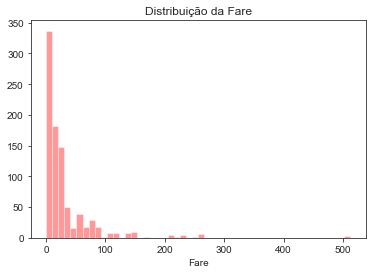

In [10]:
# Distribuição do valor da passagem
sns.distplot(trainSet['Fare'].dropna(),color='r',kde=False)
plt.title("Distribuição da Fare")

In [11]:
# Correlação das variaveis
trainSet.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Tratamento dos dados

### Valores Nulos

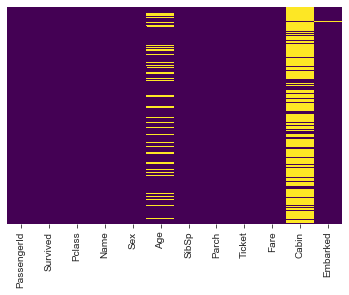

In [12]:
# Mapa de calor para verificar quais colunas possuem dados missing
sns.heatmap(trainSet.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Age - Tratamento para preencher as idades que estão missing pela mediana da idade da classe que o passageiro se encontra 

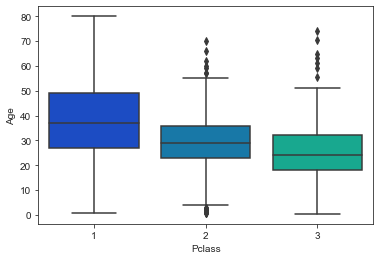

In [13]:
sns.boxplot(x='Pclass',y='Age',data=trainSet,palette='winter')

In [14]:
# Função que altera a idade dos passageiros
def altera_idade(coluna):
    Age = coluna[0]
    Pclass = coluna[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
# Aplica a função na coluna de idade
trainSet['Age'] = trainSet[['Age','Pclass']].apply(altera_idade,axis=1)
testSet['Age'] = trainSet[['Age','Pclass']].apply(altera_idade,axis=1)

#### Cabin - Muitos dados em branco, o melhor caminho é desconsiderar essa coluna

In [16]:
# Exlui os outros campos que estão nulos#
trainSet.drop('Cabin',axis=1,inplace=True)
testSet.drop('Cabin',axis=1,inplace=True)

#### Embarked - Substitui os valores nulos pelo valor mais recorrente da variável

In [17]:
trainSet['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
trainSet['Embarked'] = trainSet['Embarked'].fillna('S')
testSet['Embarked'] = testSet['Embarked'].fillna('S')

### Variáveis Categóricas

In [19]:
# Função que retorna um descritivo da base p/ encontrar as variaveis categoricas
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Name - Cria uma nova feature com o titulo da pessoa (Miss, Mr...)

In [20]:
trainSet.head(10)[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [21]:
data = [trainSet, testSet]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Titulo'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Titulo'] = dataset['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Titulo'] = dataset['Titulo'].replace('Mlle', 'Miss')
    dataset['Titulo'] = dataset['Titulo'].replace('Ms', 'Miss')
    dataset['Titulo'] = dataset['Titulo'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Titulo'] = dataset['Titulo'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Titulo'] = dataset['Titulo'].fillna(0)

trainSet = trainSet.drop(['Name'], axis=1)
testSet = testSet.drop(['Name'], axis=1)

#### Sex - Transforma a variável numérica em categórica

In [22]:
# O tratamento será aplicado na variavel Sexo
trainSet = pd.get_dummies(trainSet, columns=['Sex'])
testSet = pd.get_dummies(testSet, columns=['Sex'])

#### Embarked - Transforma a variável numérica em categórica

In [23]:
trainSet = pd.get_dummies(trainSet, columns=['Embarked'])
testSet = pd.get_dummies(testSet, columns=['Embarked'])

#### Ticket - Muitos valores únicos, não vejo muita utilidade nessa informação

In [24]:
trainSet['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [25]:
trainSet = trainSet.drop(['Ticket'], axis=1)
testSet = testSet.drop(['Ticket'], axis=1)

In [26]:
# Substitui os espaços em branco por 0
testSet.fillna(testSet.mean(), inplace=True)
testSet = testSet.fillna(trainSet.mean())

In [27]:
# Correlação das variaveis
trainSet.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Titulo,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.003878,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,0.407753,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.173929,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,-0.078909,-0.078421,0.078421,0.040700,-0.081658,0.015733
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,0.269623,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,0.315784,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,0.136310,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Titulo,0.003878,0.407753,-0.173929,-0.078909,0.269623,0.315784,0.136310,1.000000,0.502713,-0.502713,0.057499,0.011305,-0.057485
Sex_female,-0.042939,0.543351,-0.131900,-0.078421,0.114631,0.245489,0.182333,0.502713,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,-0.502713,-1.000000,1.000000,-0.082853,-0.074115,0.119224


# Modelos

In [28]:
X_train = trainSet[['Parch','Fare','Titulo','Sex_female','Embarked_C','Embarked_Q']]
Y_train = trainSet["Survived"]
X_test  = testSet[['Parch','Fare','Titulo','Sex_female','Embarked_C','Embarked_Q']]
X_train.shape, Y_train.shape, X_test.shape


((891, 6), (891,), (418, 6))

# Regressão logística

In [29]:
# Treinamento
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Teste
Y_pred0 = logreg.predict(X_test)

# Calculo da acuracia
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\ju_li\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


77.89

In [30]:
gender_submission = pd.DataFrame({"PassengerId": testSet["PassengerId"],"Survived": Y_pred0})
gender_submission.to_csv(('gender_submission_RegressaoLogistica.csv'), index=False)

# Árvore de Decisão

In [31]:
# Treinamento
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Teste
Y_pred2 = decision_tree.predict(X_test)

# Calculo da acuracia
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.59

In [32]:
gender_submission = pd.DataFrame({"PassengerId": testSet["PassengerId"],"Survived": Y_pred2})
gender_submission.to_csv(('gender_submission_Arvore.csv'), index=False)

# Random Forest 1

In [33]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.59

In [34]:
gender_submission = pd.DataFrame({"PassengerId": testSet["PassengerId"],"Survived": Y_pred2})
gender_submission.to_csv(('gender_submission_random_forest.csv'), index=False)

# Random Forest 2

In [35]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.99

In [36]:
gender_submission = pd.DataFrame({"PassengerId": testSet["PassengerId"],"Survived": Y_pred2})
gender_submission.to_csv(('gender_submission_random_forest2.csv'), index=False)

# Resultado: O modelo que teve o maior % de acerto foi o Random Forest 2 com 0.78947 de acerto